# **Data Extraction**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = "/content/phone_usage_india.csv"
data = pd.read_csv(file_path)

# Display dataset preview and initial structure
print("Dataset Preview:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Dataset Preview:
  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social

# **Data Cleaning**

In [6]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Convert data types if necessary
data_cleaned['Age'] = data_cleaned['Age'].astype(int)
data_cleaned['Monthly Recharge Cost (INR)'] = data_cleaned['Monthly Recharge Cost (INR)'].astype(float)

# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(data_cleaned.isnull().sum())

# Preview cleaned data
print("\nCleaned Data Preview:")
print(data_cleaned.head())



Missing Values After Cleaning:
User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

Cleaned Data Preview:
  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android          

# **Data Exploration**



Statistical Summary of Numeric Columns:
                Age  Screen Time (hrs/day)  Data Usage (GB/month)  \
count  17686.000000           17686.000000           17686.000000   
mean      37.584247               6.546376              25.411257   
std       13.338252               3.172677              14.122167   
min       15.000000               1.000000               1.000000   
25%       26.000000               3.800000              13.200000   
50%       38.000000               6.600000              25.300000   
75%       49.000000               9.300000              37.600000   
max       60.000000              12.000000              50.000000   

       Calls Duration (mins/day)  Number of Apps Installed  \
count               17686.000000              17686.000000   
mean                  151.405846                104.584869   
std                    84.923353                 55.217097   
min                     5.000000                 10.000000   
25%                    77.3

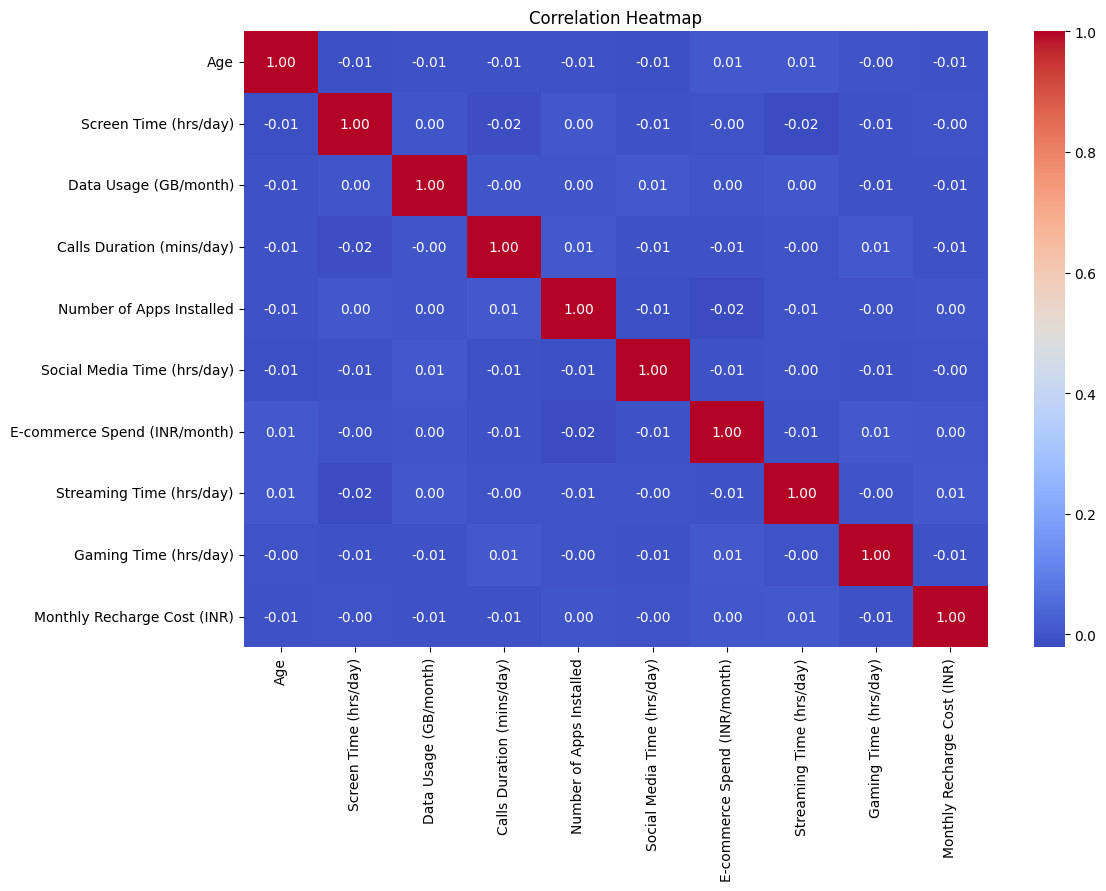

In [8]:
# Statistical summary
print("\nStatistical Summary of Numeric Columns:")
print(data_cleaned.describe())

# Correlation matrix
print("\nCorrelation Matrix:")
# Include only numerical columns in the correlation calculation
correlation_matrix = data_cleaned.select_dtypes(include=np.number).corr()
print(correlation_matrix)

# Plot a heatmap for correlations (if required, use seaborn for better visuals)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Feature Engineering**

In [9]:
# Adding a new feature for daily data usage
data_cleaned['Daily Data Usage (GB)'] = data_cleaned['Data Usage (GB/month)'] / 30

# Converting "Primary Use" into numerical labels
data_cleaned['Primary Use Encoded'] = data_cleaned['Primary Use'].astype('category').cat.codes

# Dropping non-relevant or duplicate columns (if applicable)
data_features = data_cleaned.drop(['User ID', 'Location', 'Primary Use'], axis=1)

print("\nFeatures after Engineering:")
print(data_features.head())



Features after Engineering:
   Age  Gender Phone Brand       OS  Screen Time (hrs/day)  \
0   53    Male        Vivo  Android                    3.7   
1   60   Other      Realme      iOS                    9.2   
2   37  Female       Nokia  Android                    4.5   
3   32    Male     Samsung  Android                   11.0   
4   16    Male      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/day)  E-commerce Spend (INR/month)  \
0                          3.9                 

# **Split the Dataset**

In [10]:
# Define features and target variable
X = data_features.drop(['Monthly Recharge Cost (INR)'], axis=1)  # Features
y = data_features['Monthly Recharge Cost (INR)']  # Target

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Data Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Testing Data Shapes:
X_train: (14148, 14), X_test: (3538, 14)
y_train: (14148,), y_test: (3538,)


# **Train the Predictive Model**

In [15]:
# Before splitting the data, apply one-hot encoding to all object-type columns
for column in X.select_dtypes(include=['object']).columns:
    X = pd.get_dummies(X, columns=[column], drop_first=True, prefix=[column])

# Now proceed with splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nModel Training Completed.")


Model Training Completed.


# **Evaluate the Model**

In [16]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")



Model Performance:
Mean Squared Error (MSE): 315480.31
R-squared (R2 Score): -0.04


# **Predict Future Trends**

In [17]:
# Example of predicting new or unseen data
# Replace the below example with actual unseen data if available
new_data = X_test.iloc[:5]  # Using a subset of test data for demonstration
future_predictions = model.predict(new_data)

print("\nFuture Predictions for New Data:")
print(future_predictions)



Future Predictions for New Data:
[ 981.71  977.12  960.04  935.39 1030.41]
